## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

## Load the data and make a dataframe

In [2]:
data = pd.read_csv('loans.csv')

In [3]:
data.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [4]:
data.shape

(6019, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_number              6019 non-null   int64 
 1   loan_amount            6019 non-null   int64 
 2   lender_count           6019 non-null   int64 
 3   status                 6019 non-null   object
 4   funded_date            5082 non-null   object
 5   funded_amount          6019 non-null   int64 
 6   repayment_term         6019 non-null   int64 
 7   location_country_code  6002 non-null   object
 8   sector                 6019 non-null   object
 9   description            5677 non-null   object
 10  use                    5677 non-null   object
dtypes: int64(5), object(6)
memory usage: 517.4+ KB


<Axes: ylabel='count'>

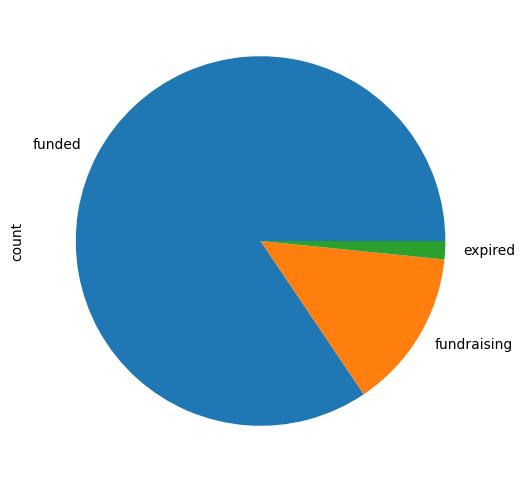

In [7]:
data['status'].value_counts().plot(kind='pie', figsize=(6,6))

## Prepara data

In [8]:
df = data[['lender_count', 'loan_amount', 'repayment_term']]

In [9]:
df['lender_count'] = (df['lender_count'] >= 5).astype(int)

## Inspecting data

In [10]:
df.head()

,lender_count,loan_amount,repayment_term
0,1,4825,8
1,1,975,12
2,1,950,14
3,1,825,14
4,1,725,13


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   lender_count    6019 non-null   int64
 1   loan_amount     6019 non-null   int64
 2   repayment_term  6019 non-null   int64
dtypes: int64(3)
memory usage: 141.2 KB


In [12]:
df.shape

(6019, 3)

In [14]:
print('missing values: ', df.isnull().sum())

missing values:  lender_count      0
loan_amount       0
repayment_term    0
dtype: int64


<Axes: ylabel='count'>

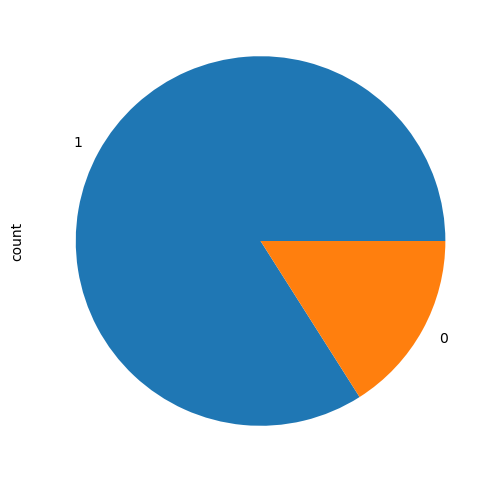

In [15]:
df['lender_count'].value_counts().plot(kind='pie', figsize=(6,6))

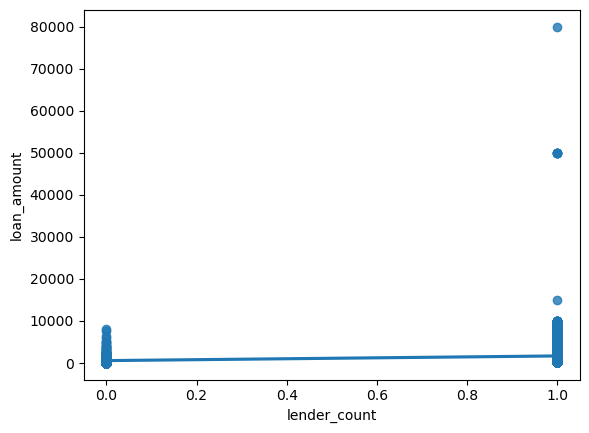

In [16]:
ax = sns.regplot(x='lender_count', y='loan_amount', data=df)

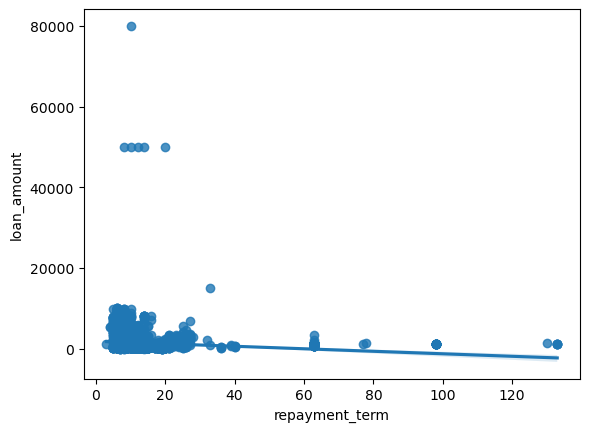

In [17]:
ax = sns.regplot(x='repayment_term', y='loan_amount',data=df)

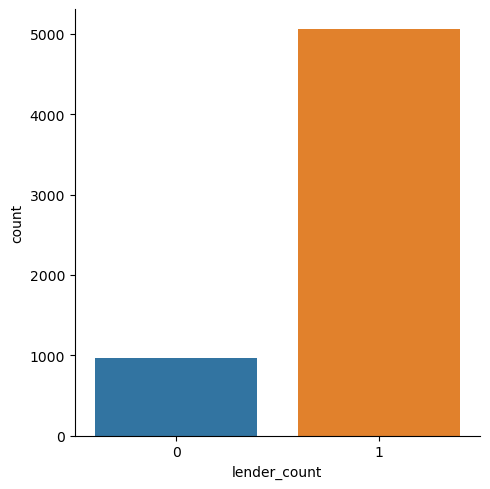

In [19]:
sns.catplot(x="lender_count", kind="count", data=df)

## Making the datasets (train, valid, test)

In [20]:
train, valid, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [21]:
train.head()

,lender_count,loan_amount,repayment_term
4959,1,725,13
5127,1,275,14
5768,0,1550,10
3242,0,75,19
5281,1,5000,8


In [22]:
valid.head()

,lender_count,loan_amount,repayment_term
1741,1,1200,17
2885,1,2325,12
2948,1,4075,11
5327,1,2000,15
2935,1,5550,8


In [23]:
test.head()

,lender_count,loan_amount,repayment_term
1361,1,575,14
5431,1,225,8
3822,0,625,14
3692,1,2150,13
3529,1,3625,6


In [24]:
print('train data shape :      ', train.shape)
print('validating data shape : ', valid.shape)
print('test data shape :       ', test.shape)

train data shape :       (4815, 3)
validating data shape :  (602, 3)
test data shape :        (602, 3)


## Spliting data 

In [53]:
X = df.drop('lender_count', axis=1)
y = df['lender_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the features

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

### logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [57]:
y_pred = log_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred, target_names=['Lenders < 5', 'Lenders >= 5'])
conf_matrix = confusion_matrix(y_test, y_pred)

In [58]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8280730897009967
Classification Report:
              precision    recall  f1-score   support

 Lenders < 5       0.00      0.00      0.00       207
Lenders >= 5       0.83      1.00      0.91       997

    accuracy                           0.83      1204
   macro avg       0.41      0.50      0.45      1204
weighted avg       0.69      0.83      0.75      1204

Confusion Matrix:
[[  0 207]
 [  0 997]]


### KNN model

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred, target_names=['Lenders < 5', 'Lenders >= 5'])
conf_matrix = confusion_matrix(y_test, y_pred)

In [62]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.1719269102990033
Classification Report:
              precision    recall  f1-score   support

 Lenders < 5       0.17      1.00      0.29       207
Lenders >= 5       0.00      0.00      0.00       997

    accuracy                           0.17      1204
   macro avg       0.09      0.50      0.15      1204
weighted avg       0.03      0.17      0.05      1204

Confusion Matrix:
[[207   0]
 [997   0]]


### Naive Bayes model

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [65]:
y_pred = nb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred,  target_names=['Lenders < 5', 'Lenders >= 5'])
conf_matrix = confusion_matrix(y_test, y_pred)

In [66]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8197674418604651
Classification Report:
              precision    recall  f1-score   support

 Lenders < 5       0.00      0.00      0.00       207
Lenders >= 5       0.83      0.99      0.90       997

    accuracy                           0.82      1204
   macro avg       0.41      0.49      0.45      1204
weighted avg       0.68      0.82      0.75      1204

Confusion Matrix:
[[  0 207]
 [ 10 987]]


### Support vector model

In [67]:
from sklearn.svm import SVC

In [68]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [69]:
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred,  target_names=['Lenders < 5', 'Lenders >= 5'])
conf_matrix = confusion_matrix(y_test, y_pred)

In [70]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8280730897009967
Classification Report:
              precision    recall  f1-score   support

 Lenders < 5       0.00      0.00      0.00       207
Lenders >= 5       0.83      1.00      0.91       997

    accuracy                           0.83      1204
   macro avg       0.41      0.50      0.45      1204
weighted avg       0.69      0.83      0.75      1204

Confusion Matrix:
[[  0 207]
 [  0 997]]


## Making the Pickle file

In [72]:
# Save the trained model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(log_model, f)

print("The best model (logistic regression) has been saved to 'model.pkl'.")

The best model (logistic regression) has been saved to 'model.pkl'.
